# Linear Regression                                        

<div class="alert alert-block alert-info">
In the frame below, we need to import the relevant libraries and install the database, yfinance.


In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import datetime
import matplotlib.pyplot as plt
import random
import numpy as np
import sklearn as sk
from scipy.stats import chi2
import seaborn as sns
import datetime

Defaulting to user installation because normal site-packages is not writeable


<div class="alert alert-block alert-info">
The ticker symbol for Apple Inc is 'AAPL'. The yfinance data from Apple Inc, starting (2004) and ending ('Current_Date') at the relevent dates seen below, is downloaded and labeled 'data'.

In [2]:
# get the data
ticker = "AAPL"
Current_Date = datetime.datetime.today()

data = yf.download(ticker, start = "2004-01-01",
                   end = Current_Date)

print(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-01-02    0.384821    0.388393    0.378214    0.380000    0.323425   
2004-01-05    0.382500    0.399821    0.382500    0.395893    0.336952   
2004-01-06    0.397321    0.400357    0.387679    0.394464    0.335736   
2004-01-07    0.394643    0.407679    0.391607    0.403393    0.343335   
2004-01-08    0.407857    0.423750    0.404464    0.417143    0.355038   
...                ...         ...         ...         ...         ...   
2023-04-19  165.800003  168.160004  165.539993  167.630005  167.630005   
2023-04-20  166.089996  167.869995  165.559998  166.649994  166.649994   
2023-04-21  165.050003  166.449997  164.490005  165.020004  165.020004   
2023-04-24  165.000000  165.600006  163.889999  165.330002  165.330002   
2023-04-25  165.190002  166.309998  163.729

<div class="alert alert-block alert-info">
In order to validate the dataset a description must be generated. Below we can see that each column has the same amount of rows.

In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4.861000e+03
mean,37.966448,38.397139,37.548730,37.990933,36.540556,4.196102e+08
std,46.983724,47.567765,46.438032,47.030591,47.042077,3.982076e+08
min,0.382500,0.388393,0.378214,0.380000,0.323425,3.519590e+07
25%,5.480000,5.550714,5.383929,5.481071,4.665040,1.212140e+08
50%,20.256071,20.424286,20.026072,20.225714,17.395344,2.893376e+08
75%,43.777500,44.150002,43.567501,43.825001,42.022659,5.940340e+08
max,182.630005,182.940002,179.119995,182.009995,180.683884,3.372970e+09


<div class="alert alert-block alert-info">
To determine if there are any null values we use .isna()

In [4]:
# Check for null values using the isna() method
null_data = data.isna()

# Print the null_df
print(null_data)

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2004-01-02  False  False  False  False      False   False
2004-01-05  False  False  False  False      False   False
2004-01-06  False  False  False  False      False   False
2004-01-07  False  False  False  False      False   False
2004-01-08  False  False  False  False      False   False
...           ...    ...    ...    ...        ...     ...
2023-04-19  False  False  False  False      False   False
2023-04-20  False  False  False  False      False   False
2023-04-21  False  False  False  False      False   False
2023-04-24  False  False  False  False      False   False
2023-04-25  False  False  False  False      False   False

[4861 rows x 6 columns]


<div class="alert alert-block alert-info">
We are wanting to create a scatter plot to first visualise if there is any linear inclination from the data.
Next, a 2D sample array is created to determine how many rows we want to include in this new table ('samples count'). A table with 1000 rows and 2 columns is created.
The number of data points in the y axis (rows) is given by 'length' for future uses.
A loop is then created where the data points are continuously looped through and given these instructions to then be inserted into the 'sample array':
    
-   A random integer between 1 and the length of the historical data.
-  'start days' is a variable that stores a random number (.randint) between the first day (0) and the length of the data, minus the 'duration days'. 
-  'end price' is assigned the adjusted closing price ('adj close') of the stock on the last day of the investment period. 
-  The 'start price' is using the 'Open' data and assigning it the 'start day' data. 
-  The 'compound return' price is calculated as the 'end price' divided by 'start price' -1.
-  As python usually works in compound calculations, it needs to be changed to its simple calculation form.
-  The first column in this new array created above, stored the duration of each sample and the second column stores the corrosponding simple returns.

In [5]:
#find period
samples_count = 1000
samples_array = np.zeros((samples_count, 3))
length = data.shape[0]
for sample_number in range(samples_count):
    duration_days = random.randint(1,length)
    start_day = random.randint(0,length-duration_days)
    end_price = data['Adj Close'].values[start_day + duration_days - 1]
    start_price = data['Open'].values[start_day]
    compound_return = end_price / start_price - 1

    # changing from compound to simple
    simple_return = ((1 + compound_return)**(1/(duration_days)) - 1)*duration_days
    samples_array[sample_number, 0] = duration_days
    samples_array[sample_number, 1] = simple_return  
    
    # We store the compound returns data in the array to get a better understanding of the data.
    samples_array[sample_number, 2] = compound_return

<div class="alert alert-block alert-info">
To understand why we cannot use the compounded returns, and why it must be changed to simple returns.

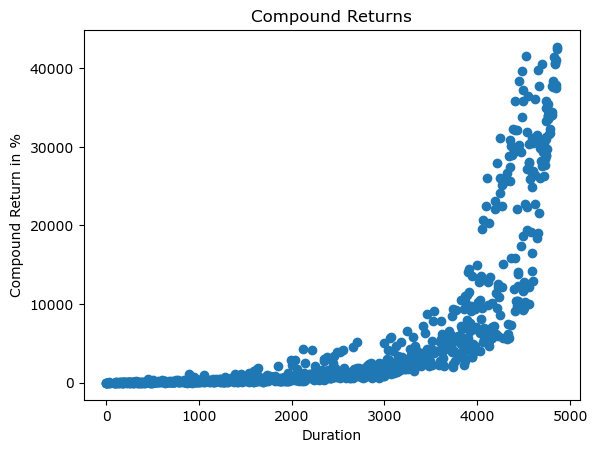

In [6]:
# Graph axis
x = samples_array [:,0]
y_compound = (samples_array[:,2])*100

#plot compound return over the period
plt.scatter(x, y_compound) 
plt.title("Compound Returns")
plt.ylabel("Compound Return in %")
plt.xlabel("Duration")
plt.show() 

<div class="alert alert-block alert-info">
To visualise the data, a graph needs to be constructed. Here we define the x and y-axis for our 2-dimensional array where, for x, we want to select all the rows ([:]) and the first column ([:0]). For y we want to select all the rows ([:]) and the second column (:1]).
The scatter plot can then be plotted and the linear regression line can be added, by least squares, where the first point will start at 0 and the last at 5000.

<style>
.output_wrapper {
    border: 1px solid black;
    padding: 10px;
}
</style>


Text(0, 0.5, 'Returns in %')

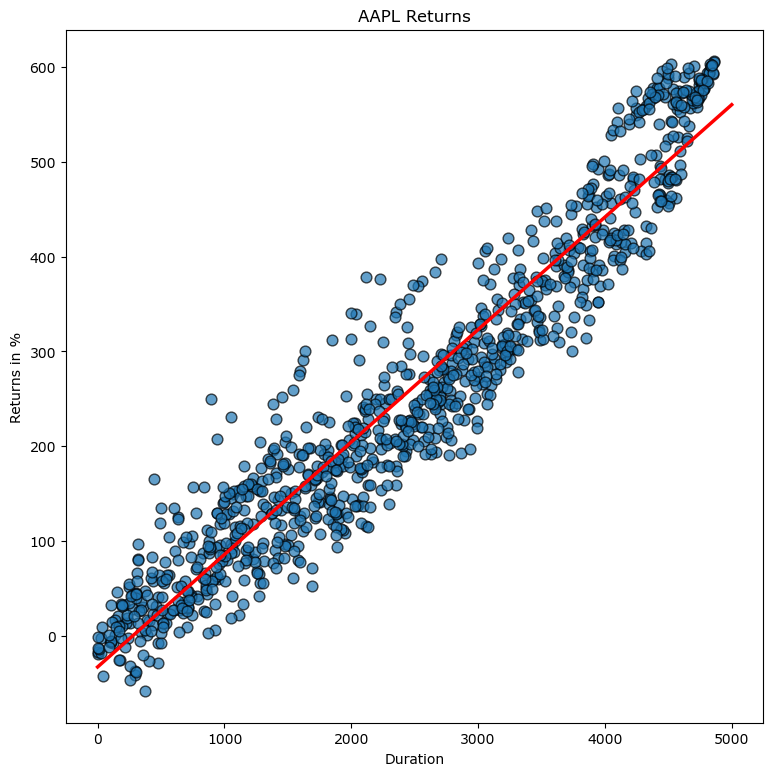

In [38]:
# Graph axis
x = samples_array [:,0]
y = (samples_array [:,1])*100

# Layout
fig, ax = plt.subplots(figsize = (9, 9))

# Scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns slope (b) and intercept (a)
# deg=1 means a linear fit 
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 5000 numbers from 0 to 5000 
xseq = np.linspace(0, 5000, num=5000)

ax.plot(xseq, a + b * xseq, color="red", lw=2.5);

plt.title("AAPL Returns")
plt.xlabel("Duration")
plt.ylabel("Returns in %")


<div class="alert alert-block alert-info">
Printing the slope and intercept of the line graph above to see if it makes sense. 

In [8]:
print(b) #slope
print(a) #intercept

0.1186770372211894
-32.95185423053065


<div class="alert alert-block alert-info">
Calculating the mean residuals (MR) through the predicted y values.
As we can see, the MR is very close to zero which indicates that the model fits the data very well. 

In [9]:
# Calculate the predicted values
y_pred = b * x + a

# Calculate the residuals
residuals = y - y_pred

# Calculate the mean of the residuals
mean_residuals = np.mean(residuals)

print("Mean residuals:", mean_residuals)

Mean residuals: 1.9207391233067028e-13


<div class="alert alert-block alert-info">
To meet the assumption of all errors being independent, the residuals are plotted on the line graph below.

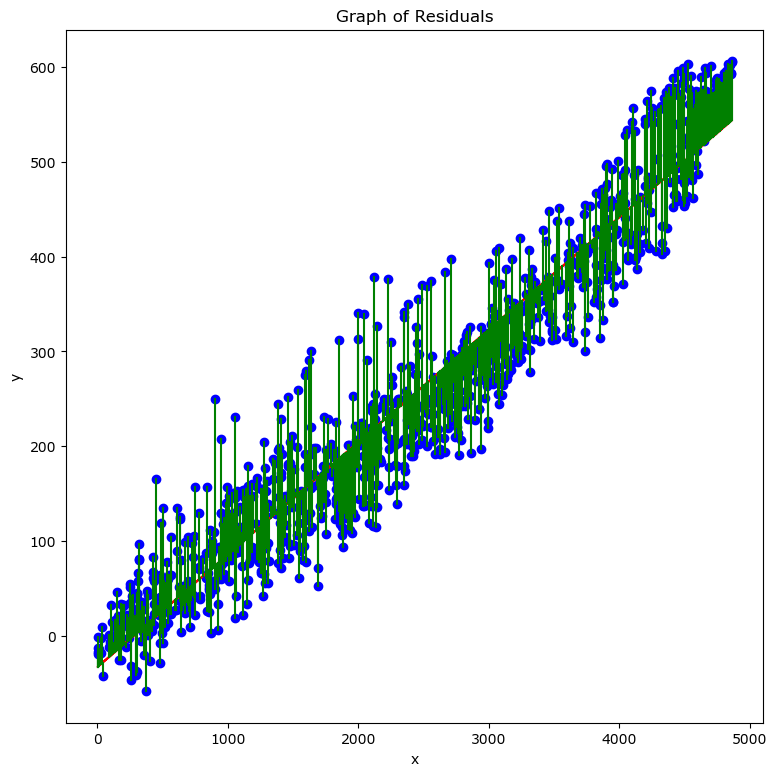

In [10]:
fig, ax = plt.subplots(figsize = (9, 9))

# Create a scatter plot of the data points
ax.scatter(x, y, color='blue')

# Overlay a line plot of the predicted values
ax.plot(x, y_pred, color='red')

# Add vertical lines connecting the data points to the predicted values
for i in range(len(x)):
    ax.plot([x[i], x[i]], [y[i], y_pred[i]], color='green')

# Set the x and y axis labels
plt.xlabel('x')
plt.ylabel('y')

# Set the plot title
plt.title('Graph of Residuals')
# Show the plot
plt.show()

<div class="alert alert-block alert-info">
To meet the homoscedasicity assumption, the sum of squares due to regression and due to error are calculated below. A hypothesis test in introduced to determine homoscedasicity of the data.
As we see below, the p-value is smaller than 0.05, indicanting significance and rejecting the null hypothesis of homoscedasicity.

In [12]:
# Compute the squared residuals
squared_residuals = residuals**2

# Fit a new regression model to the squared residuals
p_squared = np.polyfit(x, squared_residuals, 1)
squared_residuals_pred = np.polyval(p_squared, x)

# Compute the sum of squared residuals and errors
SSR = np.sum((squared_residuals - squared_residuals_pred)**2)
SSE = np.sum((residuals - np.mean(residuals))**2)

# Compute the test statistic and p-value
n = len(x)
k = 1  # number of independent variables in the original regression model
test_statistic = (SSR/SSE)*n
p_value = 1 - chi2.cdf(test_statistic, k)

# Print the test results
if p_value > 0.05:
    print('The test is not significant, indicating homoscedasticity.')
else:
    print('The test is significant, indicating heteroscedasticity.')

The test is significant, indicating heteroscedasticity.


<div class="alert alert-block alert-info">
Here we plot a histogram graph of residuals to determine if there is a normal distribution of errors. 

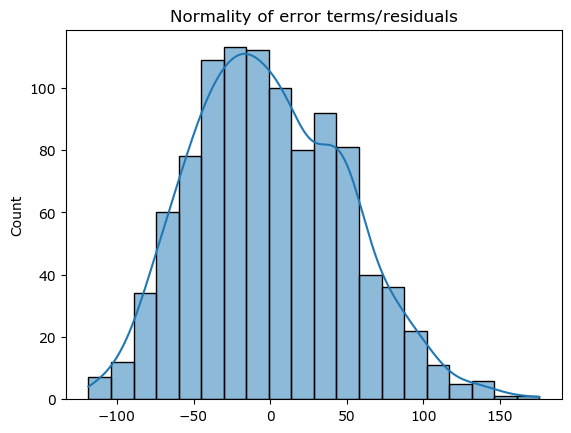

In [13]:
p = sns.histplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

<div class="alert alert-block alert-info">
Below we plot the autocorrelation graph for the residuals. This indicates a mostly random dataset, yet at a lag of ~340 there is a bigger spike, indicating the data is less random and becomes more predicatable towards the end of year.

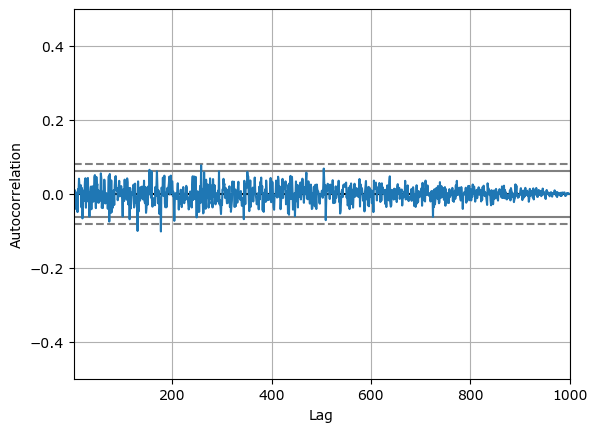

In [14]:
# plot autocorrelation
pd.plotting.autocorrelation_plot(residuals)
plt.ylim([-0.5,0.5])
plt.show()
